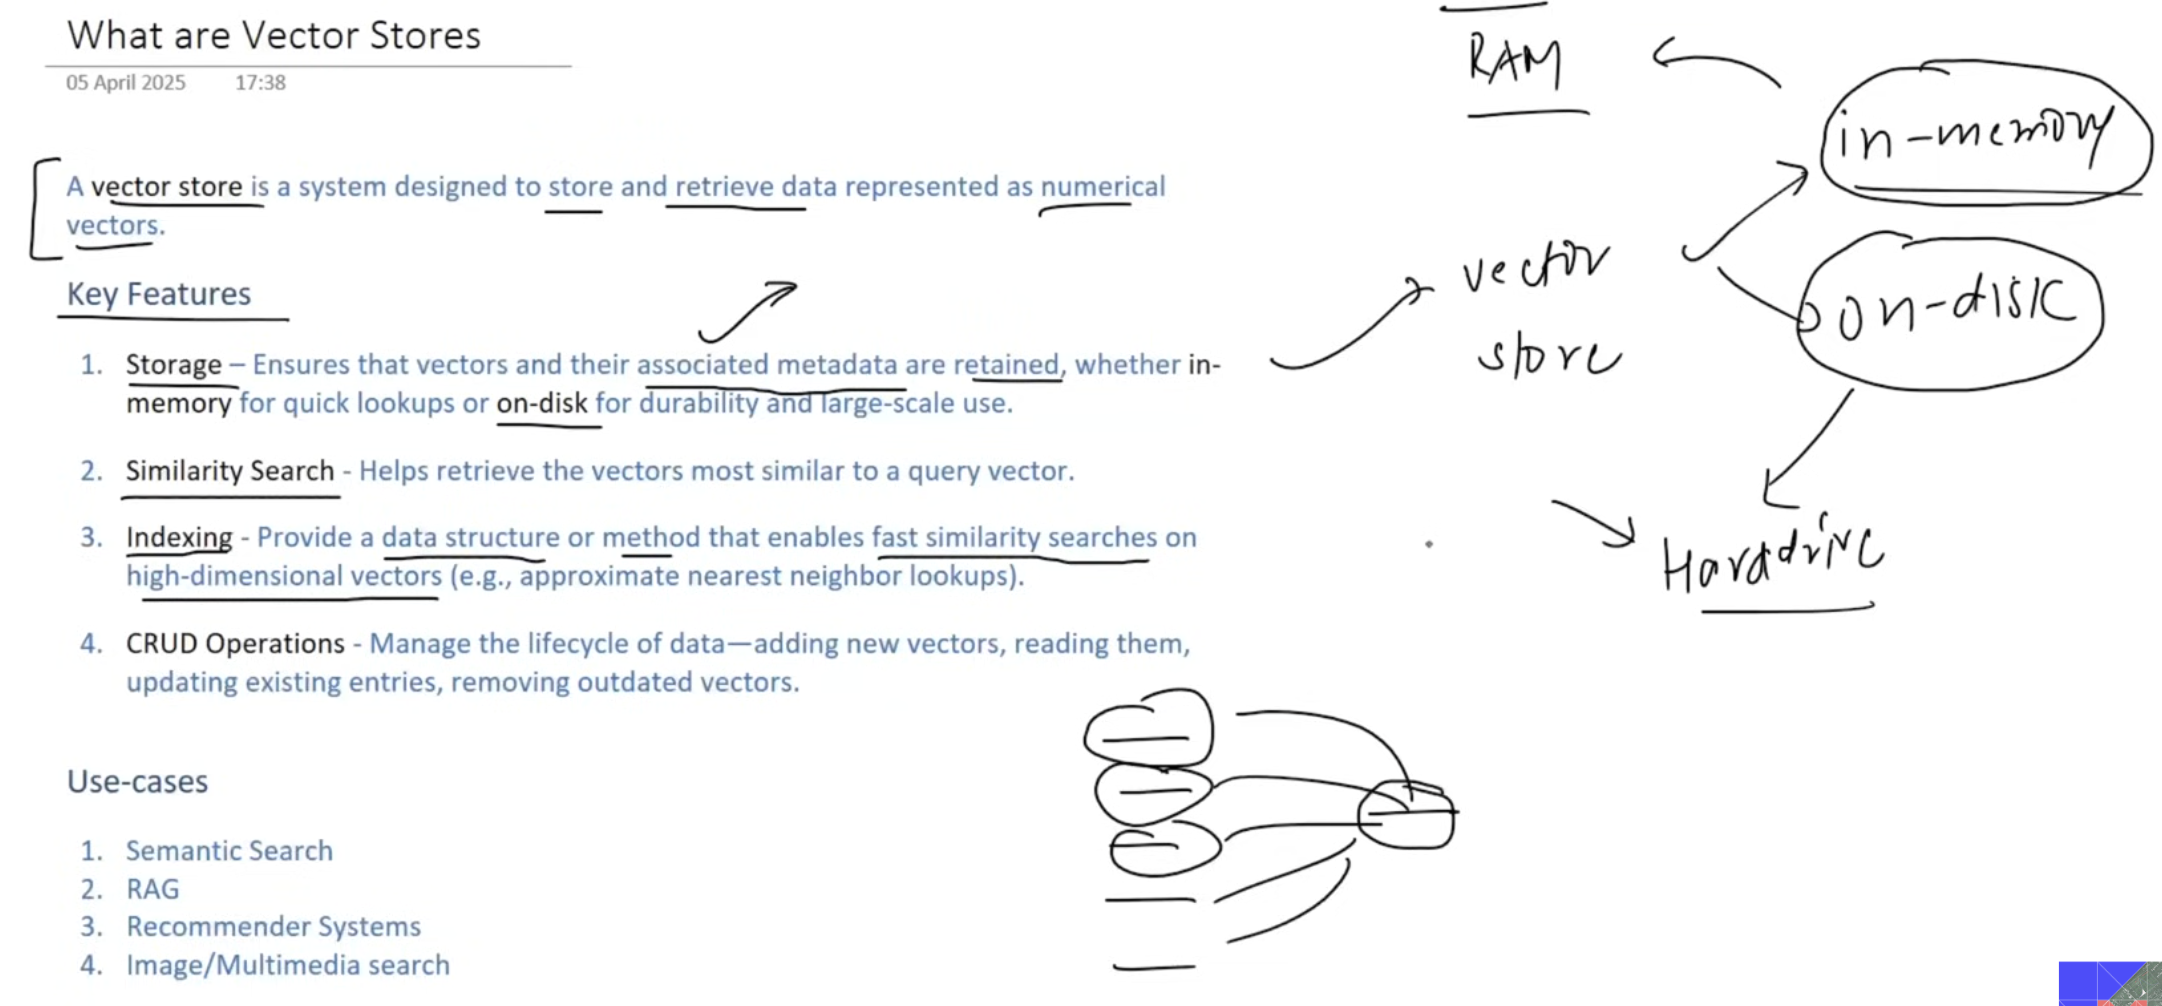

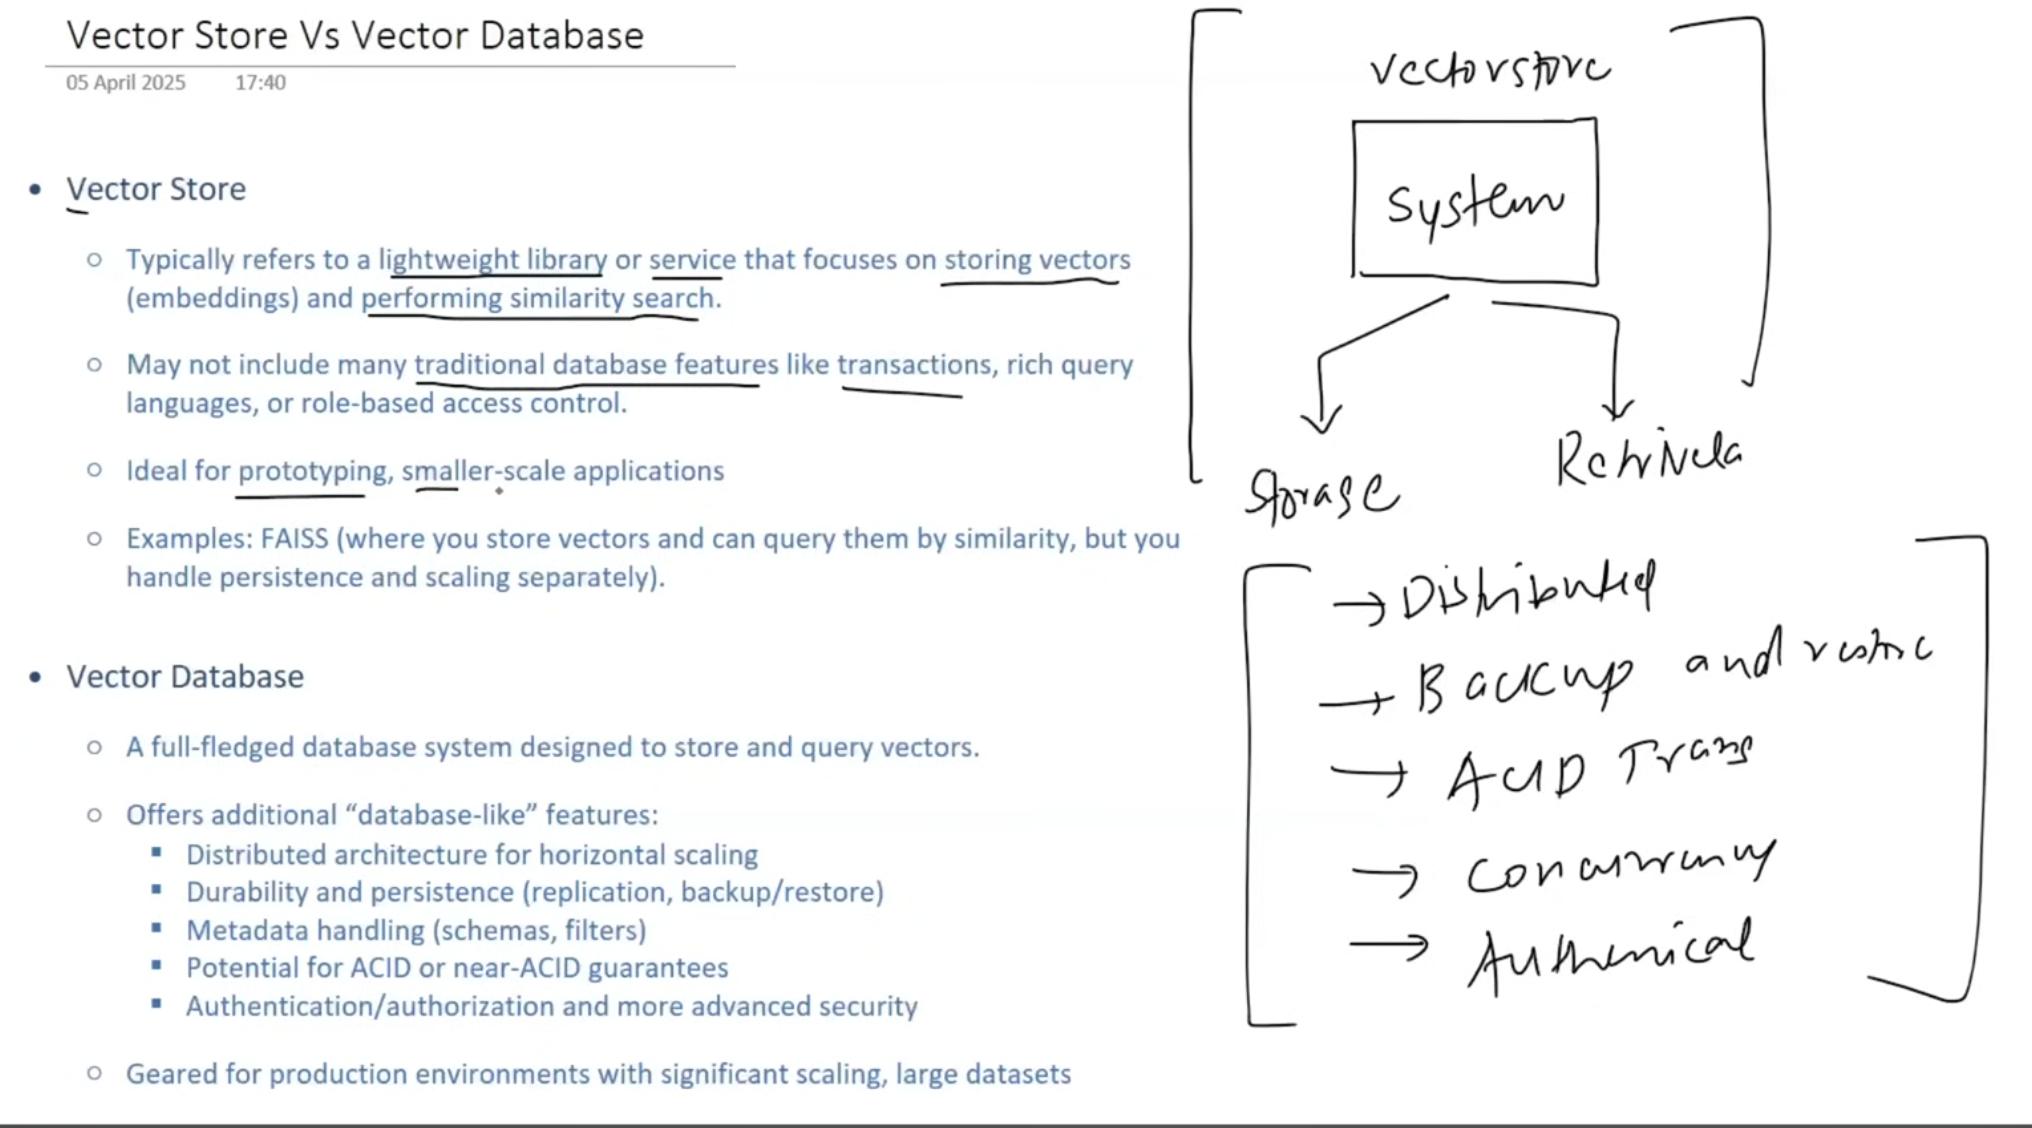

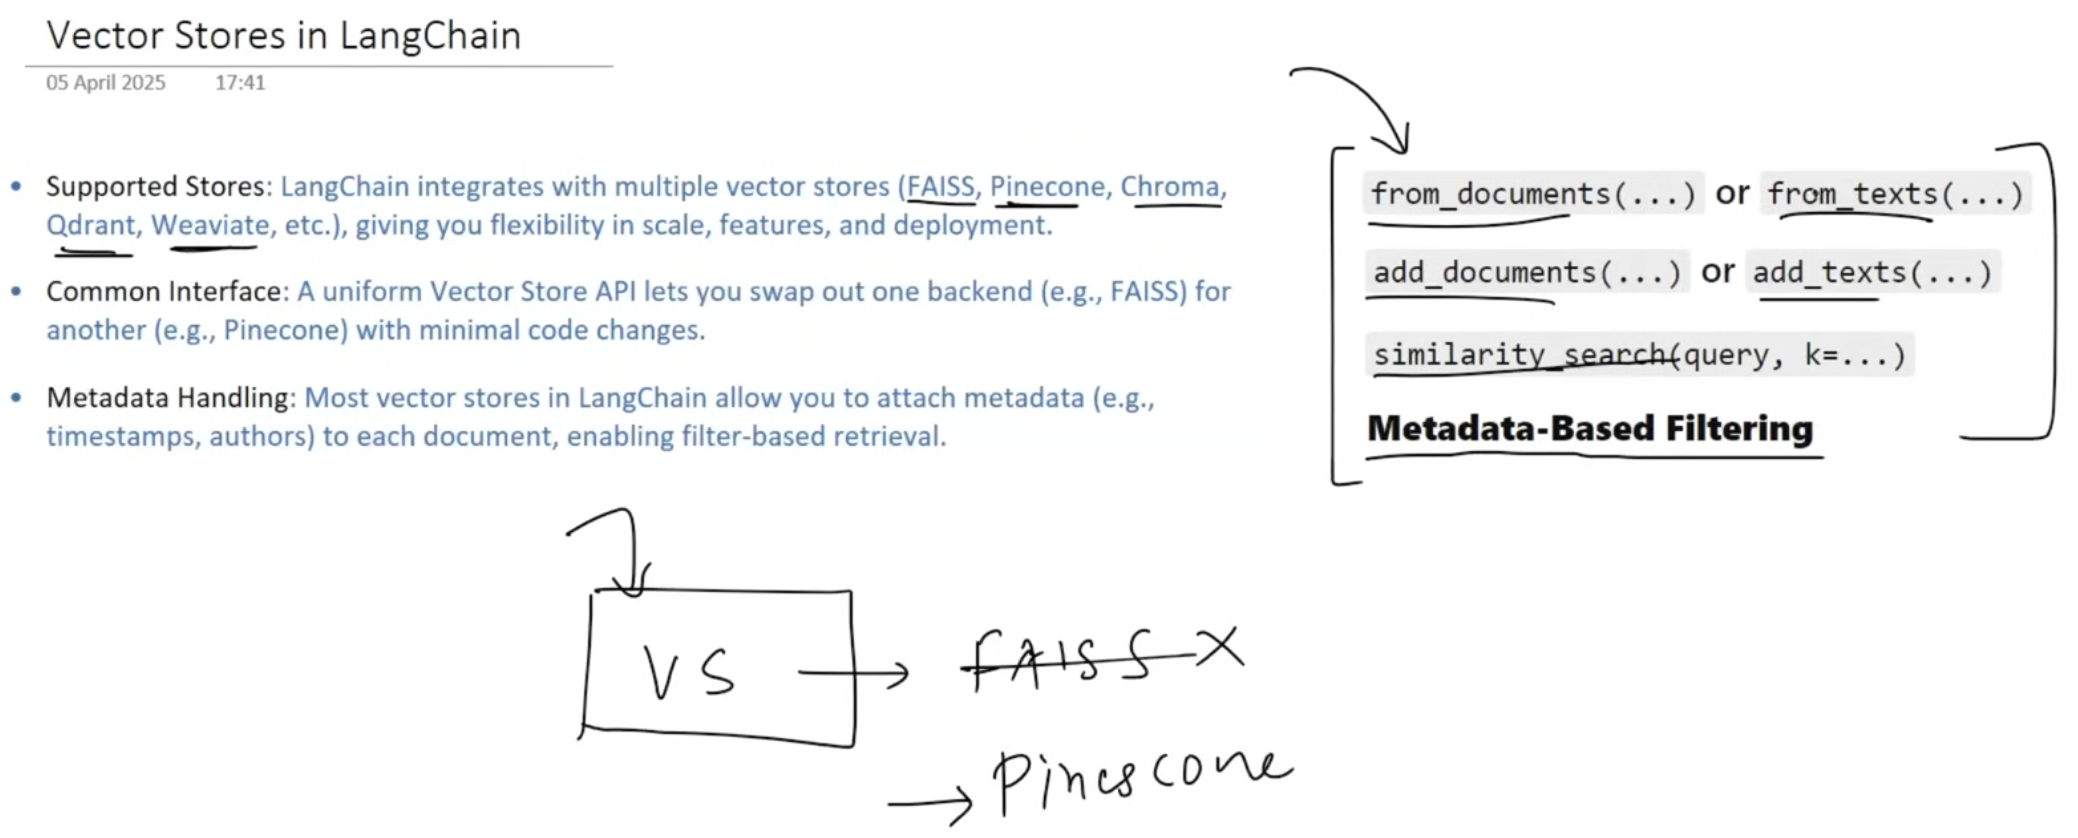

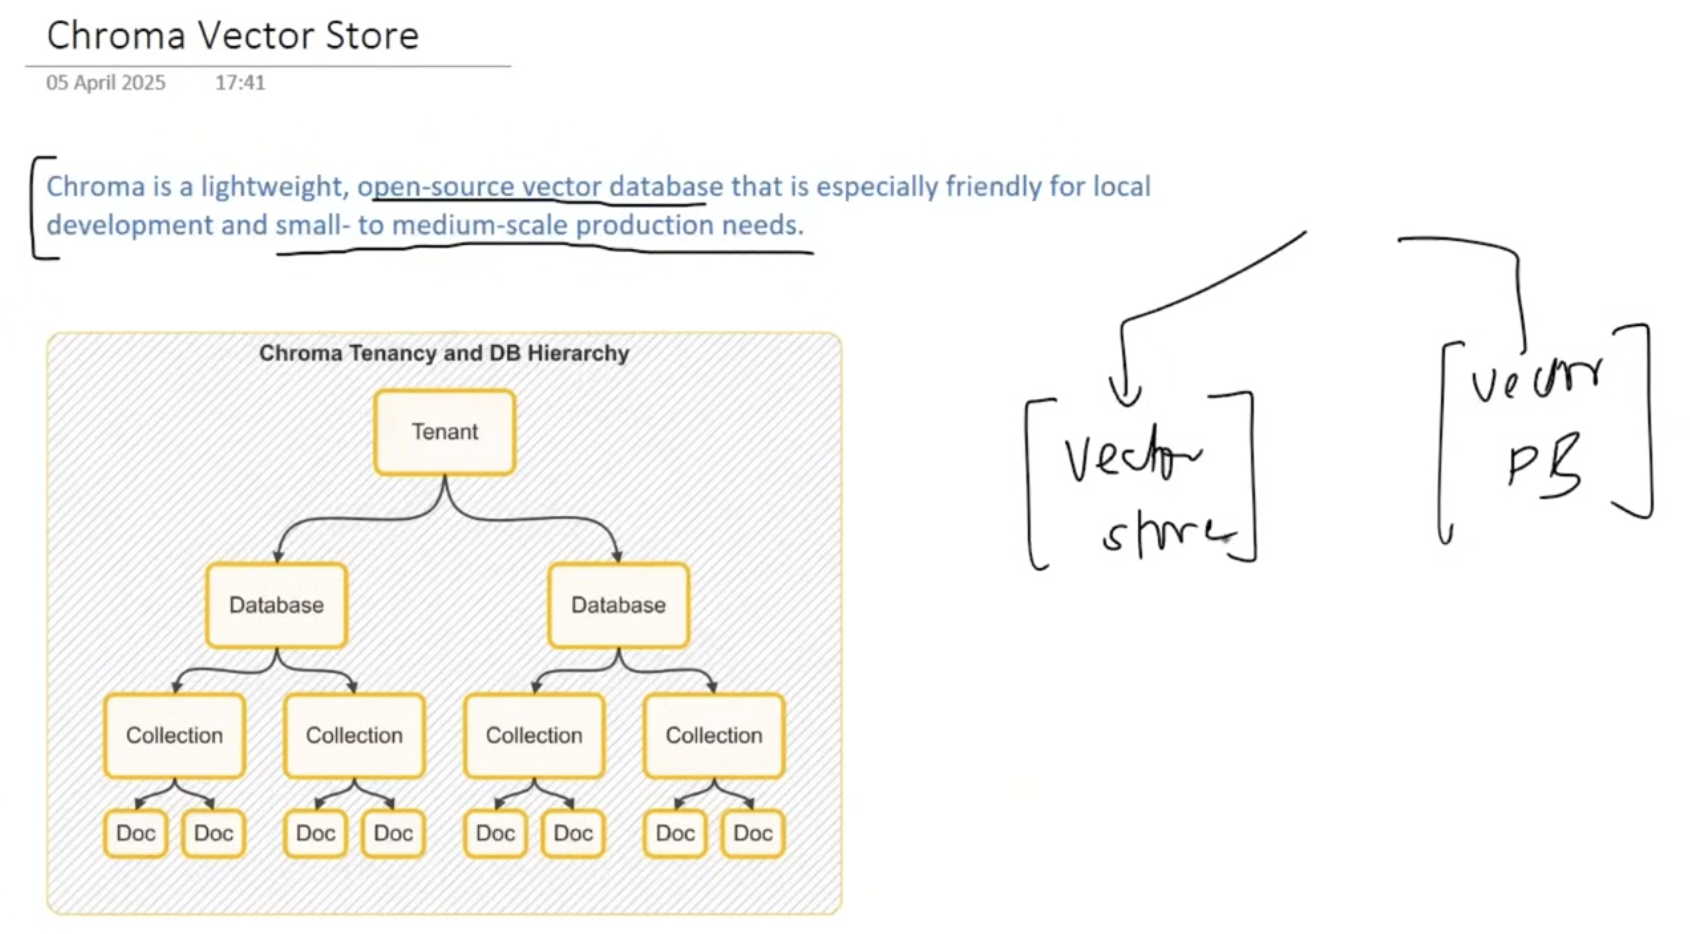

In [1]:
%pip install langchain chromadb openai tiktoken pypdf langchain_openai langchain-community

  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl.metadata (592 bytes)
   ---------------------------------------- 0.0/18.8 MB ? eta -:--:--
   -------- ------------------------------- 3.9/18.8 MB 19.6 MB/s eta 0:00:01
   ------------------ --------------------- 8.9/18.8 MB 22.2 MB/s eta 0:00:01
   ------------------------------- -------- 14.9/18.8 MB 24.1 MB/s eta 0:00:01
   ---------------------------------------- 18.8/18.8 MB 24.3 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.0 MB ? eta -:--:--
   ---------------------------------------- 2.0/2.0 MB 22.1 MB/s eta 0:00:00
Using cached protobuf-5.29.4-cp310-abi3-win_amd64.whl (434 kB)


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
orbax-checkpoint 0.11.9 requires tensorstore>=0.1.71, which is not installed.
google-api-core 1.34.1 requires protobuf!=3.20.0,!=3.20.1,!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<4.0.0dev,>=3.19.5, but you have protobuf 5.29.4 which is incompatible.
gradio 5.20.0 requires markupsafe~=2.0, but you have markupsafe 3.0.2 which is incompatible.
pyabsa 2.4.1 requires protobuf<4.0.0, but you have protobuf 5.29.4 which is incompatible.


In [2]:
from langchain.embeddings import HuggingFaceEmbeddings
from langchain.vectorstores import Chroma

embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")

C:\Users\abhin\AppData\Local\Temp\ipykernel_21720\1538969268.py:4: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_model = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")


In [3]:
from langchain.schema import Document

# Create LangChain documents for IPL players

doc1 = Document(
        page_content="Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.",
        metadata={"team": "Royal Challengers Bangalore"}
    )
doc2 = Document(
        page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure.",
        metadata={"team": "Mumbai Indians"}
    )
doc3 = Document(
        page_content="MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.",
        metadata={"team": "Chennai Super Kings"}
    )
doc4 = Document(
        page_content="Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.",
        metadata={"team": "Mumbai Indians"}
    )
doc5 = Document(
        page_content="Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.",
        metadata={"team": "Chennai Super Kings"}
    )

In [4]:
docs = [doc1, doc2, doc3, doc4, doc5]

In [5]:
vector_store = Chroma(
    embedding_function=embedding_model,
    persist_directory='my_chroma_db',
    collection_name='sample'
)

C:\Users\abhin\AppData\Local\Temp\ipykernel_21720\1842613933.py:1: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vector_store = Chroma(


In [6]:
# add documents
vector_store.add_documents(docs)

['3f9ab545-3c95-49fb-90e3-32bcb31961c9',
 'a9a9a5b2-d16d-4b04-a5d6-73fd28868027',
 '7183a52b-5caa-498a-8ede-5b7aba599ccb',
 '8e6620fb-ee11-4798-ac17-3a0814764c02',
 '9322f0ec-b120-4ed5-ad85-96de4406b0bf']

In [7]:
# view documents
vector_store.get(include=['embeddings','documents', 'metadatas'])

{'ids': ['3f9ab545-3c95-49fb-90e3-32bcb31961c9',
  'a9a9a5b2-d16d-4b04-a5d6-73fd28868027',
  '7183a52b-5caa-498a-8ede-5b7aba599ccb',
  '8e6620fb-ee11-4798-ac17-3a0814764c02',
  '9322f0ec-b120-4ed5-ad85-96de4406b0bf'],
 'embeddings': array([[ 0.00994724,  0.06914339, -0.05147114, ..., -0.03543333,
          0.01284809,  0.01248292],
        [ 0.00127739,  0.03129851, -0.02375378, ..., -0.00518361,
         -0.03280613,  0.02737718],
        [-0.10265913,  0.02650811,  0.022715  , ..., -0.03359745,
         -0.07984944, -0.01507707],
        [ 0.02123394, -0.02468548, -0.04494373, ..., -0.10995815,
          0.00572562,  0.0991538 ],
        [ 0.01873977,  0.04382848, -0.04304251, ..., -0.07801617,
         -0.07840683, -0.0030419 ]]),
 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.',
  "Rohit Sharma is the most successful ca

In [18]:
# search documents
vector_store.similarity_search_with_score(
    query='Who among these are a good bowler?',
    k=1 # number of similar results to return
)

[(Document(metadata={'team': 'Mumbai Indians'}, page_content='Jasprit Bumrah is considered one of the best fast bowlers in T20 cricket. Playing for Mumbai Indians, he is known for his yorkers and death-over expertise.'),
  0.8337133526802063)]

In [19]:
# meta-data filtering
vector_store.similarity_search_with_score(
    query="",
    filter={"team": "Chennai Super Kings"}
)

[(Document(metadata={'team': 'Chennai Super Kings'}, page_content='MS Dhoni, famously known as Captain Cool, has led Chennai Super Kings to multiple IPL titles. His finishing skills, wicketkeeping, and leadership are legendary.'),
  1.8436007499694824),
 (Document(metadata={'team': 'Chennai Super Kings'}, page_content='Ravindra Jadeja is a dynamic all-rounder who contributes with both bat and ball. Representing Chennai Super Kings, his quick fielding and match-winning performances make him a key player.'),
  1.8909372091293335)]

In [10]:
# update documents
updated_doc1 = Document(
    page_content="Virat Kohli, the former captain of Royal Challengers Bangalore (RCB), is renowned for his aggressive leadership and consistent batting performances. He holds the record for the most runs in IPL history, including multiple centuries in a single season. Despite RCB not winning an IPL title under his captaincy, Kohli's passion and fitness set a benchmark for the league. His ability to chase targets and anchor innings has made him one of the most dependable players in T20 cricket.",
    metadata={"team": "Royal Challengers Bangalore"}
)

vector_store.update_document(document_id='4e8be9cd-a304-4821-bc7f-77dc0b3824b6', document=updated_doc1)

In [11]:
# view documents
vector_store.get(include=['embeddings','documents', 'metadatas'])

{'ids': ['3f9ab545-3c95-49fb-90e3-32bcb31961c9',
  'a9a9a5b2-d16d-4b04-a5d6-73fd28868027',
  '7183a52b-5caa-498a-8ede-5b7aba599ccb',
  '8e6620fb-ee11-4798-ac17-3a0814764c02',
  '9322f0ec-b120-4ed5-ad85-96de4406b0bf'],
 'embeddings': array([[ 0.00994724,  0.06914339, -0.05147114, ..., -0.03543333,
          0.01284809,  0.01248292],
        [ 0.00127739,  0.03129851, -0.02375378, ..., -0.00518361,
         -0.03280613,  0.02737718],
        [-0.10265913,  0.02650811,  0.022715  , ..., -0.03359745,
         -0.07984944, -0.01507707],
        [ 0.02123394, -0.02468548, -0.04494373, ..., -0.10995815,
          0.00572562,  0.0991538 ],
        [ 0.01873977,  0.04382848, -0.04304251, ..., -0.07801617,
         -0.07840683, -0.0030419 ]]),
 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.',
  "Rohit Sharma is the most successful ca

In [12]:
# search documents
vector_store.similarity_search_with_score(
    query='Who among these are a batter?',
    k=2 # number of similar results to return
)

[(Document(metadata={'team': 'Mumbai Indians'}, page_content="Rohit Sharma is the most successful captain in IPL history, leading Mumbai Indians to five titles. He's known for his calm demeanor and ability to play big innings under pressure."),
  1.3784537315368652),
 (Document(metadata={'team': 'Royal Challengers Bangalore'}, page_content='Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.'),
  1.4477019309997559)]

In [13]:
# delete document
vector_store.delete(ids=['3539d1bb-f691-4e4d-896e-22675f923e1c'])

In [14]:
# view documents
vector_store.get(include=['embeddings','documents', 'metadatas'])

{'ids': ['3f9ab545-3c95-49fb-90e3-32bcb31961c9',
  'a9a9a5b2-d16d-4b04-a5d6-73fd28868027',
  '7183a52b-5caa-498a-8ede-5b7aba599ccb',
  '8e6620fb-ee11-4798-ac17-3a0814764c02',
  '9322f0ec-b120-4ed5-ad85-96de4406b0bf'],
 'embeddings': array([[ 0.00994724,  0.06914339, -0.05147114, ..., -0.03543333,
          0.01284809,  0.01248292],
        [ 0.00127739,  0.03129851, -0.02375378, ..., -0.00518361,
         -0.03280613,  0.02737718],
        [-0.10265913,  0.02650811,  0.022715  , ..., -0.03359745,
         -0.07984944, -0.01507707],
        [ 0.02123394, -0.02468548, -0.04494373, ..., -0.10995815,
          0.00572562,  0.0991538 ],
        [ 0.01873977,  0.04382848, -0.04304251, ..., -0.07801617,
         -0.07840683, -0.0030419 ]]),
 'documents': ['Virat Kohli is one of the most successful and consistent batsmen in IPL history. Known for his aggressive batting style and fitness, he has led the Royal Challengers Bangalore in multiple seasons.',
  "Rohit Sharma is the most successful ca

# We can perfrom more other operations also with vector store